# Creating a Multiple Linear Regression Model for Wine Quality (Training Data)

In [1]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [2]:
#Reading in dataset
train = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_train.csv")

#Changing column names in train and test datasets 
train.columns = [col.replace(' ', '_') for col in train.columns]

In [ ]:
#Check GVIF in R - will remove those that cause multicollinearity issues (Just removed density)

#Got model variables from stepwise selection methods done in R

#Defining the model 
model_mlr = smf.ols(
    "quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides + fixed_acidity + pH", 
    data = train).fit()
model_mlr.summary()

#Will remove the insignificant variables one-by-one

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:23:16   Log-Likelihood:                -5068.8
No. Observations:                4547   AIC:                         1.016e+04
Df Residuals:                    4536   BIC:                         1.023e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3639      0.369      6.402      0.000       1.640       3.088
Wine_Type[T.White]      -0.1318      0.058     -2.279      0.023      -0.245      -0.018
alcohol                  0.3363      0.011     31.099      0.000       0.315       0.358
volatile_acidity        -1.5138      0.090    -16.813      0.000      -1.690      -1.337
sulphates                0.5962      0.088      6.755      0.000       0.423       0.769
residual_sugar           0.0215      0.003      7.596      0.000       0.016       0.027
free_sulfur_dioxide      0.0065      0.001      7.016      0.000       0.005       0.008
total_sulfur_dioxide    -0.0019      0.000     -5.016      0.000      -0.003      -0.001
chlorides               -1.1015      0.387     -2.848      0.004      -1.860      -0.343
fixed_acidity            0.0009      0.011      0.076      0.940      -0.022       0.023
pH                       0.0569      0.086      0.663      0.507      -0.111       0.225
==============================================================================
Omnibus:                       70.727   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.393
Skew:                           0.053   Prob(JB):                     1.78e-29
Kurtosis:                       3.829   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Updated model
model_mlr = smf.ols(
    "quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = train).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     242.2
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:24:35   Log-Likelihood:                -5069.0
No. Observations:                4547   AIC:                         1.016e+04
Df Residuals:                    4538   BIC:                         1.021e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.5529      0.145     17.589      0.000       2.268       2.837
Wine_Type[T.White]      -0.1403      0.051     -2.763      0.006      -0.240      -0.041
alcohol                  0.3368      0.011     31.215      0.000       0.316       0.358
volatile_acidity        -1.5086      0.089    -17.037      0.000      -1.682      -1.335
sulphates                0.6007      0.088      6.850      0.000       0.429       0.773
residual_sugar           0.0212      0.003      7.583      0.000       0.016       0.027
free_sulfur_dioxide      0.0066      0.001      7.116      0.000       0.005       0.008
total_sulfur_dioxide    -0.0019      0.000     -5.008      0.000      -0.003      -0.001
chlorides               -1.1428      0.382     -2.989      0.003      -1.892      -0.393
==============================================================================
Omnibus:                       70.516   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.716
Skew:                           0.054   Prob(JB):                     2.50e-29
Kurtosis:                       3.827   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

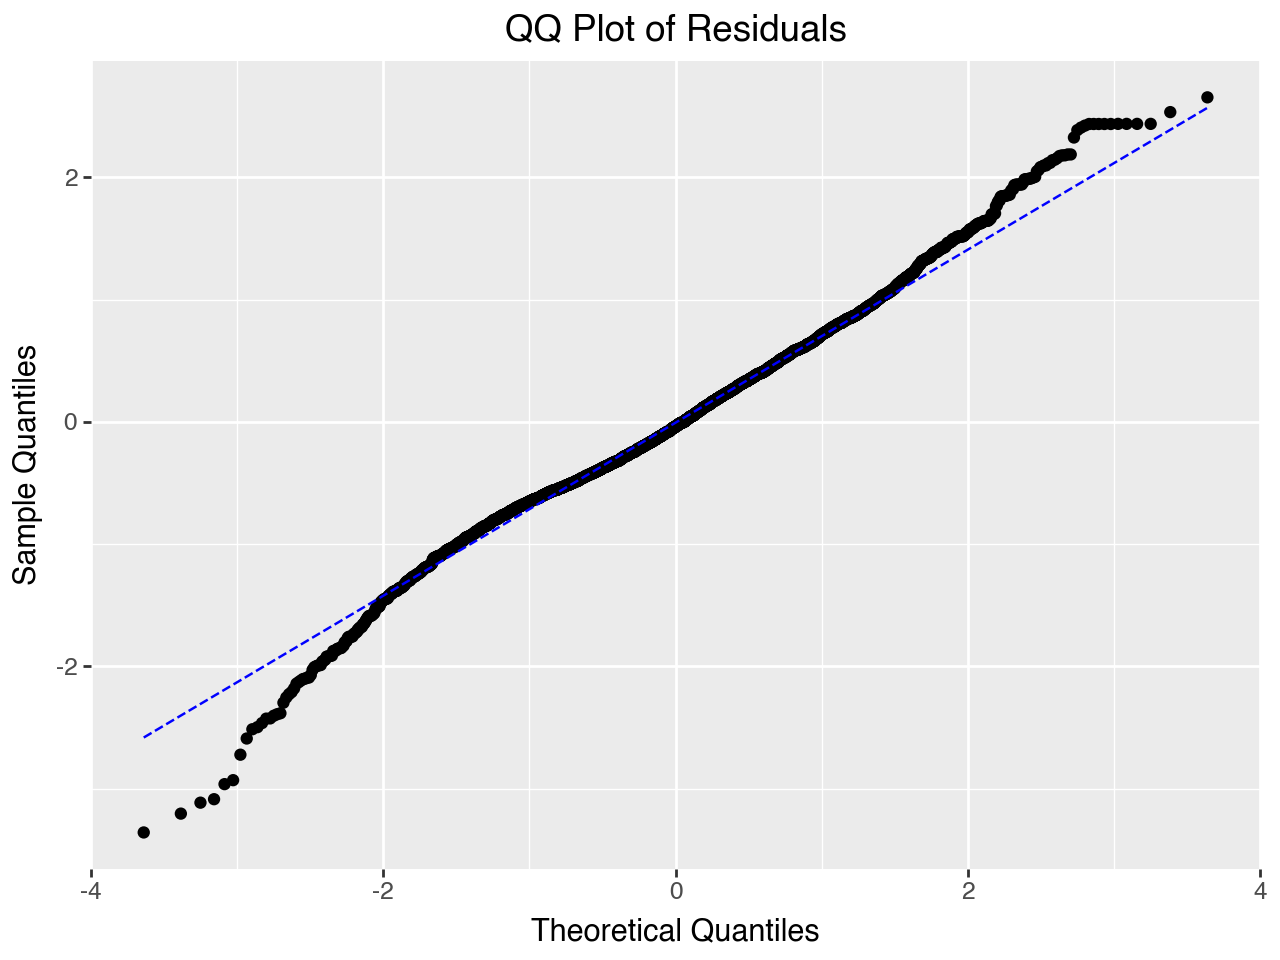

P-value is: 0.000000


In [ ]:
#Need to test our assumptions for the model

#First assumption - Check for Normality
#Identifying the model residuals
train['pred_mlr'] = model_mlr.predict()
train['resid_mlr'] = model_mlr.resid

p = (
   ggplot(train, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Looks relatively Normal, but Leptokurtic

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#P-value is zero indicates our residuals are not normal

In [ ]:
#We will account for the Non-Normality by doing a log transformation 
#Doing a log transofrmation on quality
train['log_quality'] = np.log(train['quality'])

#Fitting new model with log(quality) as the response variable
model_mlr = smf.ols(
    "log_quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = train).fit()
model_mlr.summary()

#Variables still significant at the 0.05 signficance level
#Also checked multicollinearity in R - still not present

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:14   Log-Likelihood:                 2819.1
No. Observations:                4547   AIC:                            -5620.
Df Residuals:                    4538   BIC:                            -5562.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2098      0.026     47.241      0.000       1.160       1.260
Wine_Type[T.White]      -0.0338      0.009     -3.777      0.000      -0.051      -0.016
alcohol                  0.0571      0.002     30.012      0.000       0.053       0.061
volatile_acidity        -0.2864      0.016    -18.333      0.000      -0.317      -0.256
sulphates                0.1045      0.015      6.754      0.000       0.074       0.135
residual_sugar           0.0038      0.000      7.646      0.000       0.003       0.005
free_sulfur_dioxide      0.0011      0.000      6.986      0.000       0.001       0.001
total_sulfur_dioxide    -0.0003   6.72e-05     -4.643      0.000      -0.000      -0.000
chlorides               -0.2091      0.067     -3.100      0.002      -0.341      -0.077
==============================================================================
Omnibus:                      398.787   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.133
Skew:                          -0.537   Prob(JB):                    7.81e-202
Kurtosis:                       4.933   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

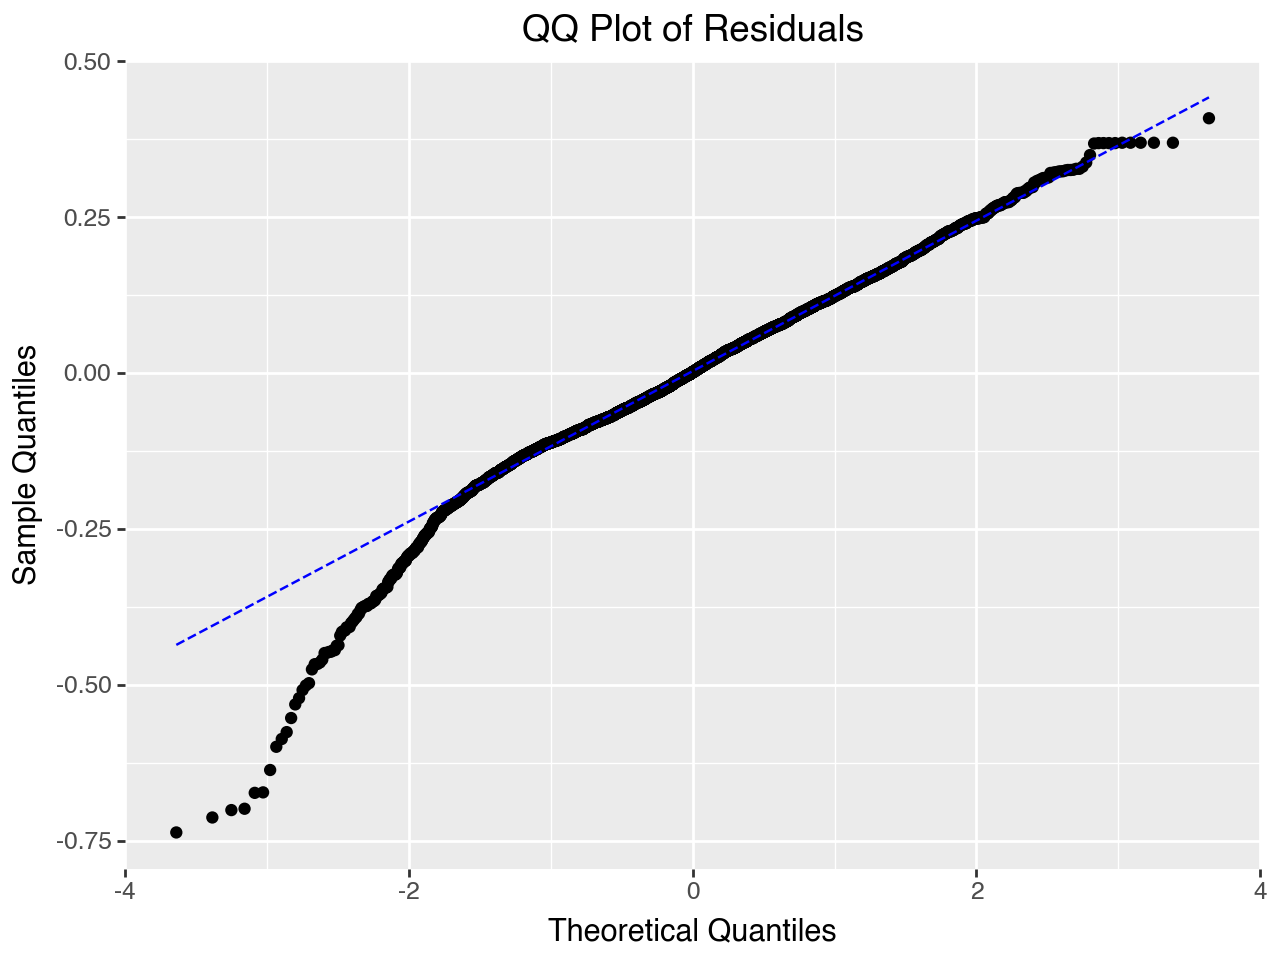

P-value is: 0.000000


In [8]:
#Checking Normality after accounting for Non-Normality with log transformation
train['pred_mlr'] = model_mlr.predict()
train['resid_mlr'] = model_mlr.resid

p = (
   ggplot(train, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#Still Not-Normal - but at least it is accounted for

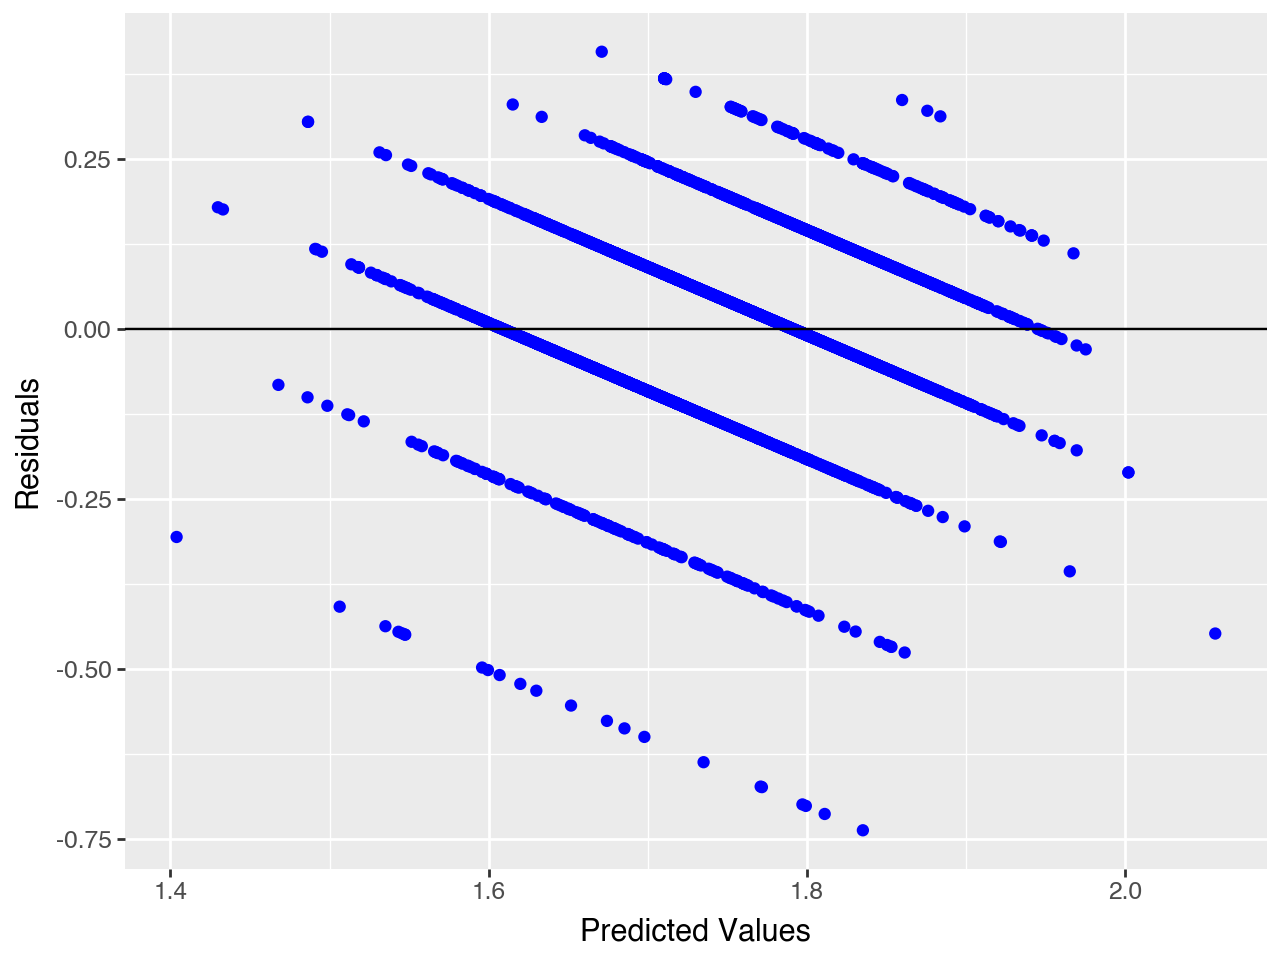

Spearman correlation: -0.011293745181266874
P-value: 0.44643701296357186


In [ ]:
#Second Assumption - Checking for equality of variances 

#Plotting residuals with a scatterplot 
p=(ggplot(train, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Weird pattern because of quality being on a scale of 1-10, no inbetween values

#Can also check equal variances with Spearman's Rank Correlation
train['abs_resid']=train['resid_mlr'].abs()
correlation, p_value = spearmanr(train['pred_mlr'], train['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#P-value greater than 0.05 indicates equal variances
#Already accounted for any heteroscedasticity with the log transformation

In [10]:
#Final summary
model_mlr = smf.ols(
    "log_quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = train).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:31:47   Log-Likelihood:                 2819.1
No. Observations:                4547   AIC:                            -5620.
Df Residuals:                    4538   BIC:                            -5562.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2098      0.026     47.241      0.000       1.160       1.260
Wine_Type[T.White]      -0.0338      0.009     -3.777      0.000      -0.051      -0.016
alcohol                  0.0571      0.002     30.012      0.000       0.053       0.061
volatile_acidity        -0.2864      0.016    -18.333      0.000      -0.317      -0.256
sulphates                0.1045      0.015      6.754      0.000       0.074       0.135
residual_sugar           0.0038      0.000      7.646      0.000       0.003       0.005
free_sulfur_dioxide      0.0011      0.000      6.986      0.000       0.001       0.001
total_sulfur_dioxide    -0.0003   6.72e-05     -4.643      0.000      -0.000      -0.000
chlorides               -0.2091      0.067     -3.100      0.002      -0.341      -0.077
==============================================================================
Omnibus:                      398.787   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.133
Skew:                          -0.537   Prob(JB):                    7.81e-202
Kurtosis:                       4.933   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""